<a href="https://colab.research.google.com/github/sharad1naruto/Predicting-Weight-with-Height-by-using-ML/blob/main/Weight_using_Height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIM**
THE  MAIN AIM IS PREDICTING THE WEIGHT OF A PERSON WITH THEIR WEIGHT BY USING MACHINE LEARNING ALGORITHMS

In [2]:
import os 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

## **Data Preparation OR Loading Data**

In [3]:
from locale import D_FMT
data=pd.read_csv("weight-height.csv")
df=data.head()
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.tail()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## **Data With Descriptive Statistics**

In [6]:
peek=data.head(20)
print(peek)

   Gender     Height      Weight
0    Male  73.847017  241.893563
1    Male  68.781904  162.310473
2    Male  74.110105  212.740856
3    Male  71.730978  220.042470
4    Male  69.881796  206.349801
5    Male  67.253016  152.212156
6    Male  68.785081  183.927889
7    Male  68.348516  167.971110
8    Male  67.018950  175.929440
9    Male  63.456494  156.399676
10   Male  71.195382  186.604926
11   Male  71.640805  213.741169
12   Male  64.766329  167.127461
13   Male  69.283070  189.446181
14   Male  69.243732  186.434168
15   Male  67.645620  172.186930
16   Male  72.418317  196.028506
17   Male  63.974326  172.883470
18   Male  69.640060  185.983958
19   Male  67.936005  182.426648


In [ ]:
data.shape

(10000, 3)

In [7]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [8]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
data.corr(method='pearson')

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


## **Data PreProcessing**

THE DATASET THAT TAKEN FROM KAGGLE HAVE COLUMN ERROR. SO, I USED RENAME FUNCTION TO CHANGE THE NAMES OF THE COLUMNS 

In [12]:
data.rename(columns={'Height':'Weight','Weight':'Height'},inplace=True)
data

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [13]:
data.isna().sum()

Gender    0
Weight    0
Height    0
dtype: int64

In [14]:
min(data.Weight),max(data.Weight)

(54.2631333250971, 78.9987423463896)

In [15]:
min(data.Height),max(data.Height)

(64.700126712753, 269.989698505106)

## **Duplicate Checking**
The Fuction That Used For Removing Duplicates is Drop_Duplicates

In [16]:
data.shape

(10000, 3)

In [17]:
data.drop_duplicates(inplace=True)
data.shape

(10000, 3)

We are having "0" duplicates in the taken dataset

## **Feature Extraction**
Feature Extraction Means Taking Necessary Input Attributes For Building The Model

In [18]:
data

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [19]:
data.drop(['Gender'], axis=1, inplace=True)

Data After Feature Extraction
Here I Removed The Gender Attribute Because It Is Not Necessary

In [20]:
data

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


## **Exploratory Data Analysis**


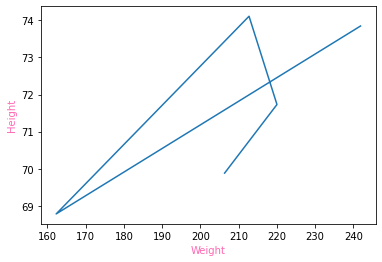

In [21]:
x=df.Weight
y=df.Height
plt.plot(df.Weight,df.Height)
# using the xlabel and ylabel functions
plt.xlabel("Weight" ,color='hotpink')
plt.ylabel("Height" ,color='hotpink')
plt.show()





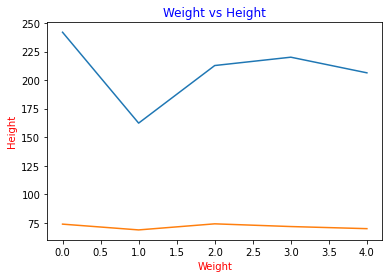

In [22]:
x=df.Weight
y=df.Height
plt.plot(x)
plt.plot(y)
# using the xlabel and ylabel functions
plt.xlabel("Weight" ,color='red')
plt.ylabel("Height" ,color='red')
plt.title("Weight vs Height" ,color='blue')
plt.show()

Text(0, 0.5, 'Height')

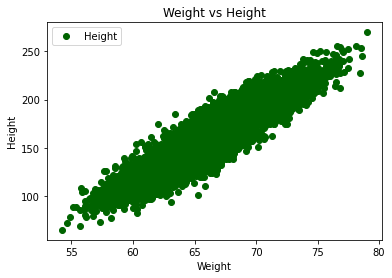

In [23]:
data.plot(x='Weight', y='Height', style='o', color ='darkgreen')
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')

## **Training** **The** **Algorithm**

In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [26]:
y

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

## **MODEL BUILDING**

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression()
print(regressor.intercept_)
print(regressor.coef_)

-350.1904028560757
[7.70936331]


In [28]:
y_pred = regressor.predict(X_test)
d1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
d1


,Actual,Predicted
0,138.085796,148.789477
1,187.363366,168.435201
2,216.533191,224.318845
3,131.761443,157.702560
4,157.718438,149.733294
...,...,...
1995,189.856786,182.410166
1996,202.906859,203.809260
1997,152.420031,159.175764
1998,170.100647,155.864045


## **PERFORMANCE METRICS**

In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 9.662897842061215
Mean Squared Error: 146.5367721395743
Root Mean Squared Error: 12.105237384684958
R2 Score: 0.8581952493935256
